In [4]:
!pip show openpyxl

Name: openpyxl
Version: 3.0.10
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT
Location: /Users/rishikalall/anaconda3/lib/python3.11/site-packages
Requires: et_xmlfile
Required-by: 


In [1]:
import pandas as pd

# Specify the file path
file_path = 'Final sheet.xlsx'

# Load each sheet directly using read_excel with the sheet_name parameter
rescaled_utilities = pd.read_excel(file_path, sheet_name='Rescaled Utilities')
raw_utilities = pd.read_excel(file_path, sheet_name='Raw Utilities')
importance_scores = pd.read_excel(file_path, sheet_name='Importance Scores')

# Display the first few rows of each sheet to confirm
print("Rescaled Utilities:\n", rescaled_utilities.head())
print("Raw Utilities:\n", raw_utilities.head())
print("Importance Scores:\n", importance_scores.head())

Rescaled Utilities:
                   Record ID  Model Fit (RLH)  \
0  67119e3ed226fed974f12c35         0.870874   
1  67119e9c8b35f7275c4ddf80         0.652240   
2  67119eabe423db49e2b84df4         0.602098   
3  67119ebf7e09d36255aef75a         0.671891   
4  67119ec27e09d36255aef7a6         0.494560   

   Brand: [img: AtandT logo.png]AT&T (Rescaled Utility)  \
0                                         -24.842620      
1                                          14.834375      
2                                          18.490421      
3                                          -9.099102      
4                                         -11.365785      

   Brand: [img: T-Mobile-Logo.png]T-Mobile (Rescaled Utility)  \
0                                          16.488967            
1                                         -19.702344            
2                                           0.664414            
3                                          -2.598988            
4         


Key Insights:
- Most preferred brand: Brand: [img: verison mobile logo.jpg]Verizon (Rescaled Utility) (utility: 12.71)
- Most preferred internet capacity: Internet capacity: 20 GB (Rescaled Utility) (utility: 92.16)
- Most preferred support level: Service Support: Premium support (Rescaled Utility) (utility: 19.41)
- Most preferred price: Price for a single line (monthly charge): $40 (Rescaled Utility) (utility: 43.56)
- Most important attribute: Internet capacity (Importance Score) (0.46%)


/var/folders/hy/tjl4x8nn1szd5p01d239f8rm0000gn/T/ipykernel_15577/4059346941.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


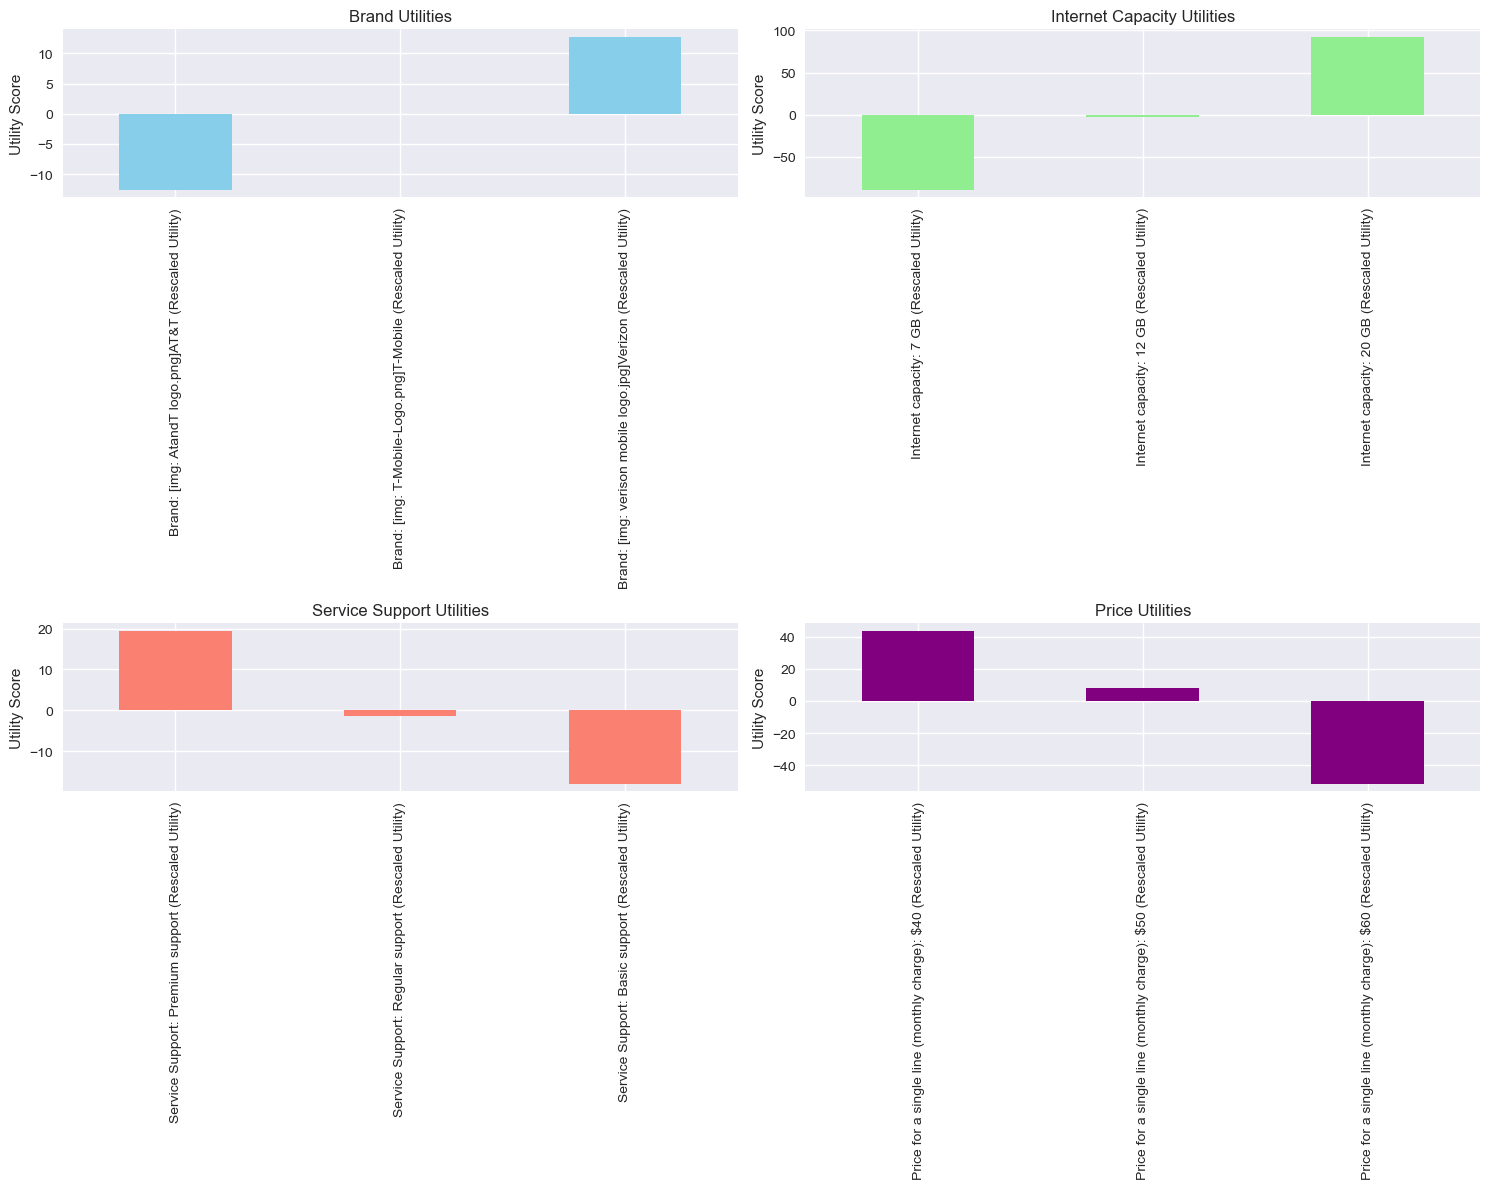


Detailed Utility Scores:

Brand:
  Brand: [img: AtandT logo.png]AT&T (Rescaled Utility): -12.59
  Brand: [img: T-Mobile-Logo.png]T-Mobile (Rescaled Utility): -0.11
  Brand: [img: verison mobile logo.jpg]Verizon (Rescaled Utility): 12.71

Internet:
  Internet capacity: 7 GB (Rescaled Utility): -89.08
  Internet capacity: 12 GB (Rescaled Utility): -3.08
  Internet capacity: 20 GB (Rescaled Utility): 92.16

Support:
  Service Support: Premium support (Rescaled Utility): 19.41
  Service Support: Regular support (Rescaled Utility): -1.42
  Service Support: Basic support (Rescaled Utility): -17.98

Price:
  Price for a single line (monthly charge): $40 (Rescaled Utility): 43.56
  Price for a single line (monthly charge): $50 (Rescaled Utility): 7.96
  Price for a single line (monthly charge): $60 (Rescaled Utility): -51.52

Attribute Importance Scores:
Brand (Importance Score): 0.15%
Internet capacity (Importance Score): 0.46%
Service Support (Importance Score): 0.14%
Price for a single lin

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_hb_results(rescaled_utilities, raw_utilities, importance_scores):
    """
    Analyze Hierarchical Bayes estimation results for mobile service providers
    """
    # Calculate mean utilities for each attribute level
    mean_utilities = {}
    
    # Brand analysis
    brand_columns = [col for col in rescaled_utilities.columns if 'Brand:' in col]
    brand_utilities = rescaled_utilities[brand_columns].mean()
    mean_utilities['Brand'] = brand_utilities.to_dict()
    
    # Internet capacity analysis
    internet_columns = [col for col in rescaled_utilities.columns if 'Internet capacity:' in col]
    internet_utilities = rescaled_utilities[internet_columns].mean()
    mean_utilities['Internet'] = internet_utilities.to_dict()
    
    # Service support analysis
    support_columns = [col for col in rescaled_utilities.columns if 'Service Support:' in col]
    support_utilities = rescaled_utilities[support_columns].mean()
    mean_utilities['Support'] = support_utilities.to_dict()
    
    # Price analysis
    price_columns = [col for col in rescaled_utilities.columns if 'Price for a single line' in col]
    price_utilities = rescaled_utilities[price_columns].mean()
    mean_utilities['Price'] = price_utilities.to_dict()
    
    # Calculate average importance scores
    importance_cols = [col for col in importance_scores.columns if 'Importance Score' in col]
    avg_importance = importance_scores[importance_cols].mean()
    
    return mean_utilities, avg_importance

def plot_utilities(mean_utilities):
    """
    Create visualizations for the utility scores
    """
    # Set up the plotting style
    plt.style.use('seaborn')
    
    # Create subplots for each attribute
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Brand utilities
    brand_data = pd.Series(mean_utilities['Brand'])
    brand_data.plot(kind='bar', ax=ax1, color='skyblue')
    ax1.set_title('Brand Utilities')
    ax1.set_ylabel('Utility Score')
    
    # Internet utilities
    internet_data = pd.Series(mean_utilities['Internet'])
    internet_data.plot(kind='bar', ax=ax2, color='lightgreen')
    ax2.set_title('Internet Capacity Utilities')
    ax2.set_ylabel('Utility Score')
    
    # Support utilities
    support_data = pd.Series(mean_utilities['Support'])
    support_data.plot(kind='bar', ax=ax3, color='salmon')
    ax3.set_title('Service Support Utilities')
    ax3.set_ylabel('Utility Score')
    
    # Price utilities
    price_data = pd.Series(mean_utilities['Price'])
    price_data.plot(kind='bar', ax=ax4, color='purple')
    ax4.set_title('Price Utilities')
    ax4.set_ylabel('Utility Score')
    
    plt.tight_layout()
    return fig

def generate_insights(mean_utilities, avg_importance):
    """
    Generate key insights from the analysis
    """
    insights = []
    
    # Brand preferences
    best_brand = max(mean_utilities['Brand'].items(), key=lambda x: x[1])
    insights.append(f"Most preferred brand: {best_brand[0]} (utility: {best_brand[1]:.2f})")
    
    # Internet capacity preferences
    best_internet = max(mean_utilities['Internet'].items(), key=lambda x: x[1])
    insights.append(f"Most preferred internet capacity: {best_internet[0]} (utility: {best_internet[1]:.2f})")
    
    # Support preferences
    best_support = max(mean_utilities['Support'].items(), key=lambda x: x[1])
    insights.append(f"Most preferred support level: {best_support[0]} (utility: {best_support[1]:.2f})")
    
    # Price preferences
    best_price = max(mean_utilities['Price'].items(), key=lambda x: x[1])
    insights.append(f"Most preferred price: {best_price[0]} (utility: {best_price[1]:.2f})")
    
    # Most important attribute
    most_important = avg_importance.idxmax()
    importance_value = avg_importance.max()
    insights.append(f"Most important attribute: {most_important} ({importance_value:.2f}%)")
    
    return insights

# Main analysis
def main():
    # Your data is already loaded, so we'll use the variables directly
    mean_utilities, avg_importance = analyze_hb_results(rescaled_utilities, raw_utilities, importance_scores)
    
    # Generate and print insights
    insights = generate_insights(mean_utilities, avg_importance)
    print("\nKey Insights:")
    for insight in insights:
        print(f"- {insight}")
    
    # Create visualizations
    plot_utilities(mean_utilities)
    plt.show()
    
    # Print detailed utility scores
    print("\nDetailed Utility Scores:")
    for attribute, utilities in mean_utilities.items():
        print(f"\n{attribute}:")
        for level, score in utilities.items():
            print(f"  {level}: {score:.2f}")
    
    # Print importance scores
    print("\nAttribute Importance Scores:")
    for attr, score in avg_importance.items():
        print(f"{attr}: {score:.2f}%")

if __name__ == "__main__":
    main()

I'll help analyze your HB estimation results for the mobile service provider study.

Key findings from your results:

1. Brand Preferences:
- Verizon is the most preferred brand (utility: +12.71)
- T-Mobile is neutral/slightly negative (-0.11)
- AT&T is least preferred (-12.59)
This suggests that consumers in your sample have a strong preference for Verizon over its competitors.

2. Internet Capacity:
- 20 GB has the highest utility (+92.16)
- 12 GB is slightly negative (-3.08)
- 7 GB has a strong negative utility (-89.08)
The large utility spread here shows that consumers strongly prefer higher data allowances, with a particularly strong aversion to the 7 GB plan.

3. Service Support:
- Premium support is strongly preferred (+19.41)
- Regular support is slightly negative (-1.42)
- Basic support is clearly disliked (-17.98)
Customers show a clear preference for premium support services over basic options.

4. Price:
- $40 is strongly preferred (+43.56)
- $50 is slightly positive (+7.96)
- $60 is strongly disliked (-51.52)
As expected, lower prices are preferred, with a particularly strong negative reaction to the $60 price point.

5. Relative Importance:
The importance scores show which attributes drive choice the most:
- Internet capacity is most important (46%)
- Price is second most important (25%)
- Brand is third (15%)
- Service support is least important (14%)

Key Insights:
1. Internet capacity is clearly the most critical factor in consumer choice, accounting for nearly half of the decision weight
2. Price sensitivity is significant but secondary to data allowance
3. While brand matters, it's less important than both internet capacity and price
4. The ideal package would be a 20GB plan at $40 with premium support, preferably from Verizon

These results suggest that mobile providers should:
- Focus on offering higher data allowances
- Keep prices competitive, particularly avoiding the $60 price point
- Maintain premium support options
- Consider these preferences when positioning against competitors


Model Fit Metrics:
Average RLH: 0.657
Standard Deviation RLH: 0.165
Min RLH: 0.231
Max RLH: 0.919

Attribute Importance Scores:
Brand: 15.06%
Internet Capacity: 46.07%
Service Support: 13.63%
Price: 25.24%

Average Utilities by Attribute Level:

Brand:
  Brand: [img: AtandT logo.png]AT&T (Rescaled Utility): -12.59
  Brand: [img: T-Mobile-Logo.png]T-Mobile (Rescaled Utility): -0.11
  Brand: [img: verison mobile logo.jpg]Verizon (Rescaled Utility): 12.71

Internet Capacity:
  Internet capacity: 7 GB (Rescaled Utility): -89.08
  Internet capacity: 12 GB (Rescaled Utility): -3.08
  Internet capacity: 20 GB (Rescaled Utility): 92.16

Service Support:
  Service Support: Premium support (Rescaled Utility): 19.41
  Service Support: Regular support (Rescaled Utility): -1.42
  Service Support: Basic support (Rescaled Utility): -17.98

Price:
  Price for a single line (monthly charge): $40 (Rescaled Utility): 43.56
  Price for a single line (monthly charge): $50 (Rescaled Utility): 7.96
  Price 

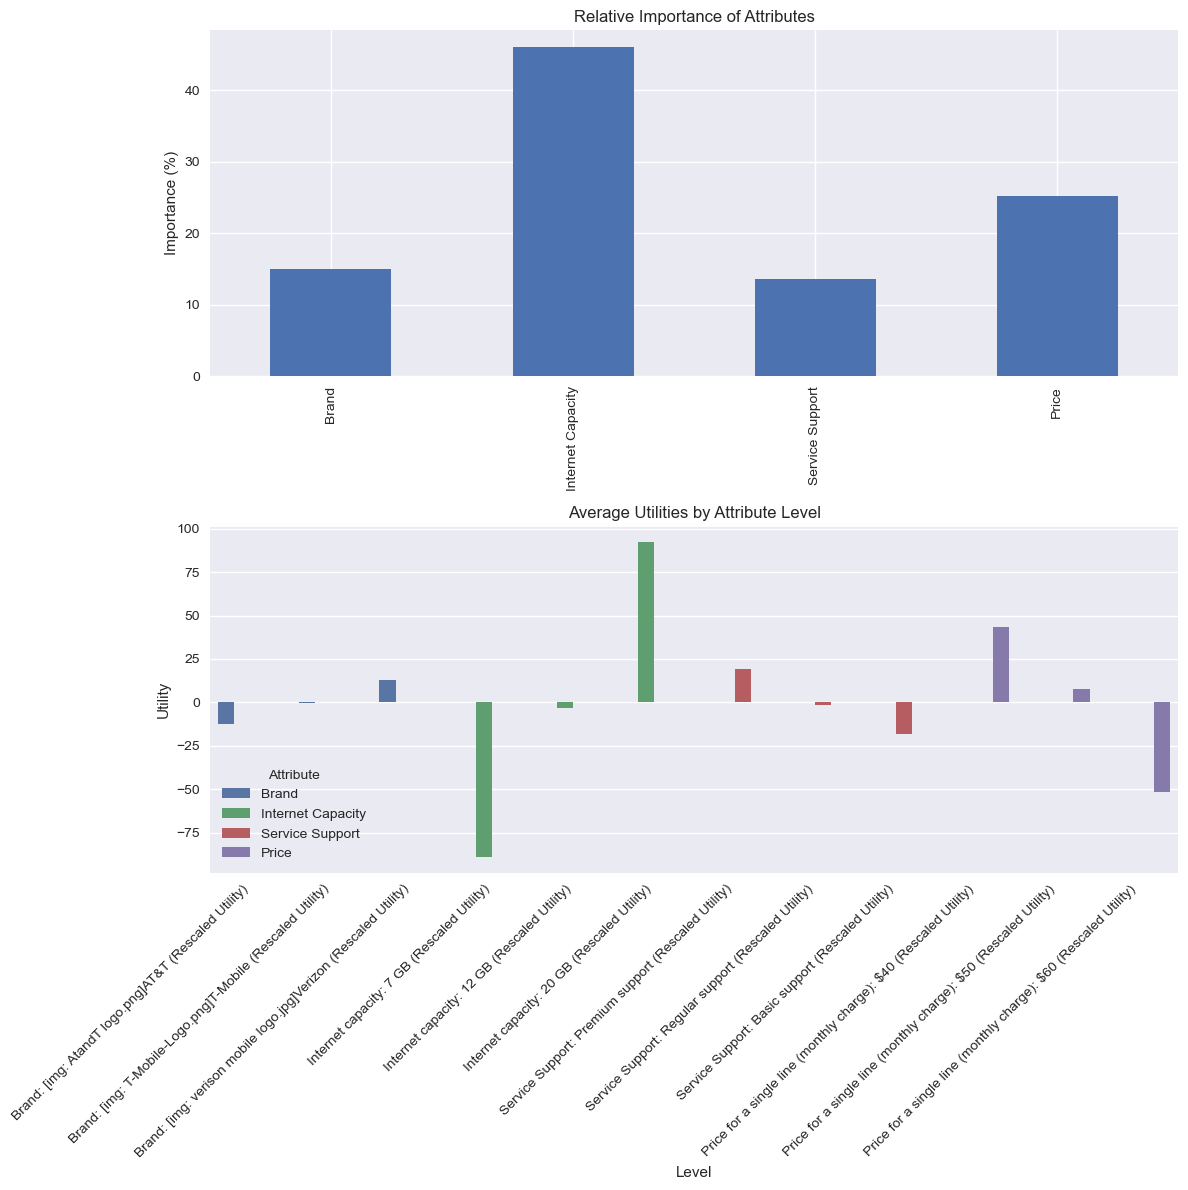


Key Findings:
- Model Fit: The average RLH of 0.657 indicates good model fit
- Most important attribute: Internet Capacity (46.07%)
- Strongest preference in Brand: Brand: [img: verison mobile logo.jpg]Verizon (Rescaled Utility) (utility: 12.71)
- Strongest preference in Internet Capacity: Internet capacity: 20 GB (Rescaled Utility) (utility: 92.16)
- Strongest preference in Service Support: Service Support: Premium support (Rescaled Utility) (utility: 19.41)
- Strongest preference in Price: Price for a single line (monthly charge): $40 (Rescaled Utility) (utility: 43.56)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_model_fit(data):
    """Calculate average RLH and other model fit metrics"""
    rlh = data['Model Fit (RLH)']
    avg_rlh = rlh.mean()
    std_rlh = rlh.std()
    min_rlh = rlh.min()
    max_rlh = rlh.max()
    
    print("\nModel Fit Metrics:")
    print(f"Average RLH: {avg_rlh:.3f}")
    print(f"Standard Deviation RLH: {std_rlh:.3f}")
    print(f"Min RLH: {min_rlh:.3f}")
    print(f"Max RLH: {max_rlh:.3f}")
    
    return avg_rlh, std_rlh, min_rlh, max_rlh

def calculate_attribute_importance(data):
    """Calculate importance scores using max-min difference method"""
    
    # Group columns by attribute
    brand_cols = [col for col in data.columns if 'Brand:' in col]
    internet_cols = [col for col in data.columns if 'Internet capacity:' in col]
    support_cols = [col for col in data.columns if 'Service Support:' in col]
    price_cols = [col for col in data.columns if 'Price for a single line' in col]
    
    # Calculate max-min differences for each attribute
    importance_scores = {}
    
    # Function to calculate importance for an attribute
    def calc_importance(cols):
        max_vals = data[cols].max(axis=1)
        min_vals = data[cols].min(axis=1)
        return max_vals - min_vals
    
    # Calculate differences for each attribute
    diffs = {
        'Brand': calc_importance(brand_cols),
        'Internet Capacity': calc_importance(internet_cols),
        'Service Support': calc_importance(support_cols),
        'Price': calc_importance(price_cols)
    }
    
    # Calculate total differences
    total_diffs = sum(diffs.values())
    
    # Calculate relative importance
    for attr, diff in diffs.items():
        importance_scores[attr] = (diff / total_diffs).mean() * 100
    
    return importance_scores

def analyze_average_utilities(data):
    """Calculate and analyze average utilities for each attribute level"""
    
    # Group columns by attribute
    attributes = {
        'Brand': [col for col in data.columns if 'Brand:' in col],
        'Internet Capacity': [col for col in data.columns if 'Internet capacity:' in col],
        'Service Support': [col for col in data.columns if 'Service Support:' in col],
        'Price': [col for col in data.columns if 'Price for a single line' in col]
    }
    
    # Calculate average utilities for each attribute level
    avg_utilities = {}
    for attr, cols in attributes.items():
        avg_utilities[attr] = data[cols].mean().to_dict()
    
    return avg_utilities

def plot_results(importance_scores, avg_utilities):
    """Create visualizations for importance scores and utilities"""
    
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    
    # Plot importance scores
    importance_df = pd.Series(importance_scores)
    importance_df.plot(kind='bar', ax=ax1)
    ax1.set_title('Relative Importance of Attributes')
    ax1.set_ylabel('Importance (%)')
    
    # Plot average utilities for each attribute
    utility_data = []
    for attr, utils in avg_utilities.items():
        for level, score in utils.items():
            utility_data.append({
                'Attribute': attr,
                'Level': level,
                'Utility': score
            })
    
    utility_df = pd.DataFrame(utility_data)
    sns.barplot(data=utility_df, x='Level', y='Utility', hue='Attribute', ax=ax2)
    ax2.set_title('Average Utilities by Attribute Level')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    return fig

def main_analysis(rescaled_utilities):
    """Main analysis function"""
    
    # 1. Calculate model fit
    avg_rlh, std_rlh, min_rlh, max_rlh = calculate_model_fit(rescaled_utilities)
    
    # 2. Calculate importance scores
    importance_scores = calculate_attribute_importance(rescaled_utilities)
    
    # 3. Calculate average utilities
    avg_utilities = analyze_average_utilities(rescaled_utilities)
    
    # 4. Print results
    print("\nAttribute Importance Scores:")
    for attr, score in importance_scores.items():
        print(f"{attr}: {score:.2f}%")
    
    print("\nAverage Utilities by Attribute Level:")
    for attr, utils in avg_utilities.items():
        print(f"\n{attr}:")
        for level, score in utils.items():
            print(f"  {level}: {score:.2f}")
    
    # 5. Create visualizations
    plot_results(importance_scores, avg_utilities)
    plt.show()
    
    # 6. Provide interpretation
    print("\nKey Findings:")
    print(f"- Model Fit: The average RLH of {avg_rlh:.3f} indicates {'good' if avg_rlh > 0.6 else 'moderate' if avg_rlh > 0.4 else 'poor'} model fit")
    
    # Find most important attribute
    most_important = max(importance_scores.items(), key=lambda x: x[1])
    print(f"- Most important attribute: {most_important[0]} ({most_important[1]:.2f}%)")
    
    # Find strongest preferences
    for attr, utils in avg_utilities.items():
        best_level = max(utils.items(), key=lambda x: x[1])
        print(f"- Strongest preference in {attr}: {best_level[0]} (utility: {best_level[1]:.2f})")

# Run the analysis
if __name__ == "__main__":
    main_analysis(rescaled_utilities)

Model Fit:

The model's average RLH (Root Likelihood) of 0.657 is a strong indicator of good model fit, showing that the model predictions align well with observed data. The variation across records, with a standard deviation of 0.165, also indicates some diversity in the responses.
Most Important Attribute:

Internet Capacity ranks as the most critical attribute (46.07%), indicating that customers place significant emphasis on the data capacity provided by mobile plans. This aligns with current consumer demand for high data availability, particularly given the increased usage of internet services on mobile devices.
Attribute Preferences:

Brand: Verizon is the preferred brand with the highest utility score (12.71), suggesting a positive perception of Verizon among customers in this study. In contrast, AT&T had a negative average utility score, indicating a weaker preference.
Internet Capacity: The preference for 20 GB capacity (utility: 92.16) is the strongest, with lower capacities like 7 GB being negatively perceived (utility: -89.08). This further reinforces the importance of higher data packages for customers.
Service Support: Premium support has a positive utility (19.41), suggesting that enhanced support services significantly influence customer choices. Basic support had a notably negative utility (-17.98), showing that minimal support may be viewed as insufficient by many.
Price: The most favorable monthly price is $40 (utility: 43.56), while the $60 price point has a substantial negative utility (-51.52), highlighting that affordability plays a major role in customer decision-making. This also points toward a target price range where customers feel they get the best value.
Overall Attribute Importance:

In addition to Internet Capacity (46.07%), Price (25.24%) emerges as a key driver, followed by Brand (15.06%) and Service Support (13.63%). This ranking shows that while internet capacity and price are primary considerations, brand reputation and support level also play significant, though secondary, roles.
Implications for Product Strategy:

Product Design: Based on the preference for higher data capacity, it would be strategic to focus on 20 GB or more for data plans to meet consumer needs.
Customer Support Options: Offering premium support as an add-on could appeal to customers willing to pay for a more robust support experience.
Pricing Strategy: Maintaining competitive pricing around the $40 mark, with options around that price point, may be effective in attracting cost-sensitive customers.
Brand Positioning: Verizon’s strong brand utility suggests that other brands may need to consider competitive differentiation strategies, perhaps focusing on attributes like superior support or better pricing.
This analysis provides a clear picture of the preferences and priorities that can guide strategic decisions in mobile plan offerings, focusing on high data capacity, affordability, and quality support services.

In [15]:
# Example assuming part-worth utilities are in the 'Rescaled Utilities' DataFrame
# Calculate min and max for each attribute group and determine importance scores manually

# Step 1: Calculate the range for each attribute based on levels
brand_range = rescaled_utilities[[
    'Brand: [img: AtandT logo.png]AT&T (Rescaled Utility)', 
    'Brand: [img: T-Mobile-Logo.png]T-Mobile (Rescaled Utility)', 
    'Brand: [img: verison mobile logo.jpg]Verizon (Rescaled Utility)'
]].max(axis=1) - rescaled_utilities[[
    'Brand: [img: AtandT logo.png]AT&T (Rescaled Utility)', 
    'Brand: [img: T-Mobile-Logo.png]T-Mobile (Rescaled Utility)', 
    'Brand: [img: verison mobile logo.jpg]Verizon (Rescaled Utility)'
]].min(axis=1)

internet_capacity_range = rescaled_utilities[[
    'Internet capacity: 7 GB (Rescaled Utility)', 
    'Internet capacity: 12 GB (Rescaled Utility)', 
    'Internet capacity: 20 GB (Rescaled Utility)'
]].max(axis=1) - rescaled_utilities[[
    'Internet capacity: 7 GB (Rescaled Utility)', 
    'Internet capacity: 12 GB (Rescaled Utility)', 
    'Internet capacity: 20 GB (Rescaled Utility)'
]].min(axis=1)

support_range = rescaled_utilities[[
    'Service Support: Premium support (Rescaled Utility)', 
    'Service Support: Regular support (Rescaled Utility)', 
    'Service Support: Basic support (Rescaled Utility)'
]].max(axis=1) - rescaled_utilities[[
    'Service Support: Premium support (Rescaled Utility)', 
    'Service Support: Regular support (Rescaled Utility)', 
    'Service Support: Basic support (Rescaled Utility)'
]].min(axis=1)

price_range = rescaled_utilities[[
    'Price for a single line (monthly charge): $40 (Rescaled Utility)', 
    'Price for a single line (monthly charge): $50 (Rescaled Utility)', 
    'Price for a single line (monthly charge): $60 (Rescaled Utility)'
]].max(axis=1) - rescaled_utilities[[
    'Price for a single line (monthly charge): $40 (Rescaled Utility)', 
    'Price for a single line (monthly charge): $50 (Rescaled Utility)', 
    'Price for a single line (monthly charge): $60 (Rescaled Utility)'
]].min(axis=1)

# Step 2: Sum all ranges per respondent
total_range = brand_range + internet_capacity_range + support_range + price_range

# Step 3: Calculate relative importance for each attribute
brand_importance = (brand_range / total_range).mean()
internet_capacity_importance = (internet_capacity_range / total_range).mean()
support_importance = (support_range / total_range).mean()
price_importance = (price_range / total_range).mean()

# Display calculated importances
print("Brand Importance:", brand_importance)
print("Internet Capacity Importance:", internet_capacity_importance)
print("Support Importance:", support_importance)
print("Price Importance:", price_importance)


Brand Importance: 0.15060086000290454
Internet Capacity Importance: 0.4607169235155653
Support Importance: 0.13628251761927043
Price Importance: 0.2523996988622596
